In [13]:
import glob
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import basename
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator

sys.path.append("../../")
from helpers.experiment import tag_label_feature_split, make_train_test_split

%matplotlib inline

In [ ]:
dataset_folder = "../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])

nrow=round(len(datasets)/2)
ncol=2

fig, axs=plt.subplots(nrow, ncol, figsize=(10,nrow*3))
fig.suptitle("Components to Explain 95% of Dataset Variance\n(Spectrograms to Slightly Less)\n")
axs=axs.flatten()

for index,dataset in enumerate(datasets):

    if "spectrogram" in dataset:
        n_components = 2400
    else:
        n_components = .95
    
    pca=PCA(n_components=n_components)   
    
    df = pd.read_pickle(dataset)
    
    _, (y, _), X = tag_label_feature_split(df, label_format="encoded")
    X_train_std, _, _, _ = make_train_test_split(X, y, test_size=0.2, stratify=y, x_scaler="standard")
    
    original_features = df.shape[1]
    
    pca.fit (X_train_std)
    
    axs[index].plot(np.cumsum(pca.explained_variance_ratio_))
    axs[index].set_title(f"{basename(dataset)} ({original_features} features)")
    axs[index].set(xlabel=f"number of components ({pca.components_.shape[0]} total)",
                   ylabel="cumulative explained variance")
    axs[index].xaxis.set_major_locator(MaxNLocator(integer=True))
  
if len(datasets)%2 == 1:
    fig.delaxes(axs[-1])
    
plt.tight_layout()    
plt.show()
fig.savefig("pca.png")

In [ ]:
dataset_folder = "../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])

result = []

for dataset in datasets:
    
    pca=PCA(n_components=3)   
    
    df = pd.read_pickle(dataset)
    
    _, (y, _), X = tag_label_feature_split(df, label_format="encoded")
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(X, y, test_size=0.2, stratify=y, x_scaler="standard")
   
    X_train_pca = pca.fit_transform (X_train_std)
    X_test_pca = pca.transform (X_test_std)
    
    result.append([basename(dataset),
                   pca.explained_variance_ratio_[0],
                   sum(pca.explained_variance_ratio_[0:2]),
                   sum(pca.explained_variance_ratio_[0:3])])
df = pd.DataFrame(result, columns=["dataset", "1 Component", "2 Components", "3 Components"])
df

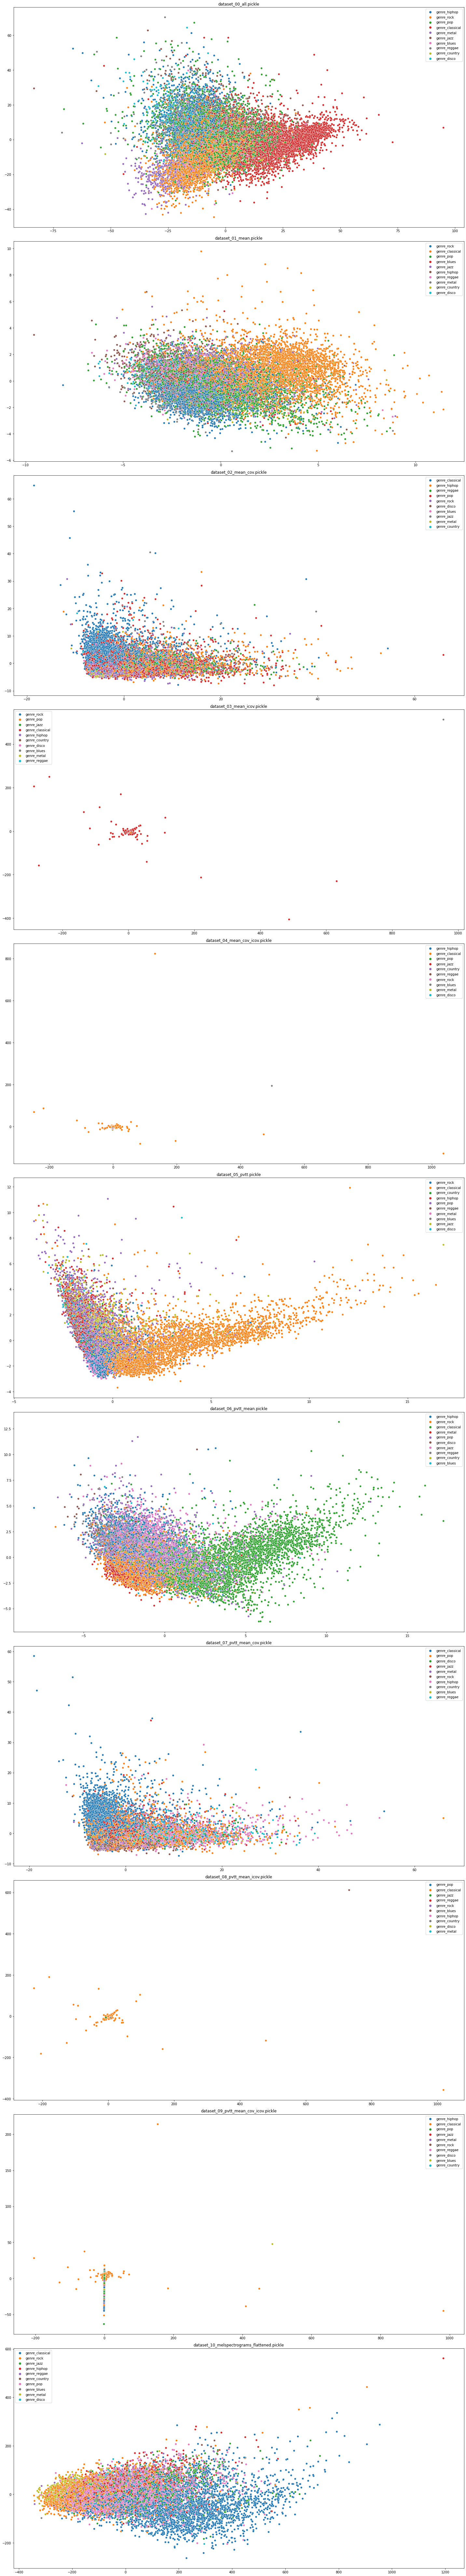

In [21]:
import seaborn as sns
dataset_folder = "../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])

nrow=len(datasets)

fig, axs=plt.subplots(nrow, figsize=(20,nrow*10))
axs=axs.flatten()

for index,dataset in enumerate(datasets):

    pca=PCA(n_components=3)   
    
    df = pd.read_pickle(dataset)

    _, (y, le), X = tag_label_feature_split(df, label_format="encoded")
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(X, y, test_size=0.2, stratify=y, x_scaler="standard")
   
    X_train_pca = pca.fit_transform (X_train_std)
    X_test_pca = pca.transform (X_test_std)    
    
    sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=le.inverse_transform(y_train), ax=axs[index]).set(title=basename(dataset))
 
plt.tight_layout()    
plt.show()
fig.savefig("pca_2d_scatter.png")